---代码文档说明: ---
1. 本 jupyter notebook 为复习 time series 对应代码

# Set Env
## / prepare env

In [1]:
# import libs

## official libs
import pprint as pp

#import display

## compute libs
import pandas as pd
import numpy as np

## vis libs
import pandas.plotting as pds
import matplotlib.pyplot as plt
import seaborn as sns

## display
import IPython.display as dis
%matplotlib inline

In [2]:
# set display

## 显示数量
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 1000)

## 列宽
pd.set_option('max_colwidth',1000)

#使用 None 参数为显示所有，在数据非常多时要小心
#扩展 https://stackoverflow.com/questions/27163830/ipython-notebook-pandas-max-allowable-columns

In [3]:
# check env (mac)
!python --version
!conda list | grep numpy
!conda list | grep pandas
!conda list | grep matplotlib
!conda list | grep seaborn
!conda list | grep jupyter

#也可以使用 .__version__ 方法，但对于子目录结构的倒入（matplotlib）这种方式则会报错
#print(pd.__version__, np.__version__, sns.__version__)

Python 3.8.2
numpy                     1.18.1           py38h7241aed_0  
numpy-base                1.18.1           py38h6575580_1  
pandas                    1.0.3            py38h6c726b0_0  
pandas-datareader         0.8.1                      py_0  
matplotlib                3.1.3                    py38_0  
matplotlib-base           3.1.3            py38h9aa3819_0  
seaborn                   0.10.0                     py_0  
jupyter                   1.0.0                    py38_7  
jupyter_client            6.1.2                      py_0  
jupyter_console           6.1.0                      py_0  
jupyter_contrib_core      0.3.3                      py_2    conda-forge
jupyter_core              4.6.3                    py38_0  
jupyter_nbextensions_configurator 0.4.1                    py38_0    conda-forge


# Review List
1. review: https://zhuanlan.zhihu.com/p/35128342
    1. 知识点比较全 cn
    2. 未提供数据文件
1. review: https://ourcodingclub.github.io/tutorials/pandas-time-series/
    1. 数据量较大
    2. dataset/omni2_all_years.dat
1. review: https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/
    1. 数据来自 open power system data
    2. dataset/opsd_germany_daily.txt

# Review 3
data dictionary:
* `Date` — The date (_yyyy-mm-dd_ format)
* `Consumption` — Electricity consumption in GWh (gigawatt-hours)
* `Wind` — Wind power production in GWh
* `Solar` — Solar power production in GWh
* `Wind+Solar` — Sum of wind and solar power production in GWh

questions such as:
* When is electricity consumption typically highest and lowest?
* How do wind and solar power production vary with seasons of the year?
* What are the long-term trends in electricity consumption, solar power, and wind power?
* How do wind and solar power production compare with electricity consumption, and how has this ratio changed over time?

In [25]:
# load df
df = pd.read_csv('dataset/opsd_germany_daily.txt')

#如果是 jason 文件类型，注意经常需要加参数 lines=True
#参考 https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html

## / Audit

### // function
一般来讲，可以把经常用到的命令写为函数或自己的库进行调用，此处为了方便把函数直接放到 notebook 中。当然不用函数也是可以的，喜欢的话可以自己定义自己常用的函数完成评估部分。

**function list:**

- **check df**
    - checkdf(df) - 基准df信息输出
    - checkdup(df) - 重复信息检查
    - checkstring(df,random=42) - 对于列信息包含大量文本,详细输出文字信息
- **check column**
    - checknest(df,colname) - 嵌套信息输出
    - checkvalue(df,list='all') - 检查指定列的value分布
- **alter data**
    - dorpcolumn(df,collist) - 删除列

In [37]:
# section1
def checkdf(df):
    '''
    input: dataframe which to exam
    
    check:
    shape, info, head, tail, null
    for some feature are long and can not be show full length,
    so use this function to see all in detail.
    
    output: str
    '''
    print('/// Checking Start /')

    displaystr = "check shape"
    print('\n', displaystr.center(79, '-'))
    print(df.shape)

    displaystr = "check info"
    print('\n', displaystr.center(79, '-'))
    print(df.info())
    
    displaystr = "check statistics"
    print('\n', displaystr.center(79, '-'))
    print(df.describe())
    
    displaystr = "check columns"
    print('\n', displaystr.center(79, '-'))
    print(df.columns)

    displaystr = "check head and tail"
    print('\n', displaystr.center(79, '-'))
    dis.display(df.head(1))
    dis.display(df.tail(1))

    displaystr = "check null"
    print('\n', displaystr.center(79, '-'))
    print(df.isnull().sum())
    
    return print('\n / Checking Complete /// \n')


def checkdup(df):
    '''
    input: dataframe which to exam
    
    check:
    duplicated info of the data,
    if there are columns contain interabel, will enconter a error,
    use try/except to warining if so.
    
    output: str
    '''
    print('/// Checking Start /')
    
    displaystr = "check duplicate"
    print('\n', displaystr.center(79, '-'))

    try:
        numdup = df.duplicated().sum()
    except TypeError:
        displaystr = ' found list like, can not check '
        print('\n', displaystr.center(79, '-'))
    else:
        if numdup > 0:
            prestr = ' duplicated No.: ' + str(numdup) + ' '
            print('\n', prestr.center(79, '-'))
            df[df.duplicated()]
        else:
            displaystr = 'no dupliate found'
            print('\n', displaystr.center(40, '*'))
    finally:
        #return print('\n / Checking Complete /// \n\n')
        pass
    
   
    return print('\n / Checking Complete /// \n\n')
    
    #df.duplicated is using set to determine the duplicates
    #hence all objects in the series must be hashable. Lists are not hashable.
    #扩展 https://stackoverflow.com/questions/50020231/pandas-typeerror-unhashable-type-list


def checkstring(df,random=42):
    '''
    input: dataframe which to exam
    
    check:
    a sample of the data,
    for some feature are long and can not be show full length,
    so use this function to see all in detail.
    
    output: str
    '''
    print('/// Checking Start /')
    
    sample = df.sample(1,random_state=random)
    print('---checking sample index: {}---'.format(sample.index[0]))
    for (colname, coldata) in sample.iteritems():
        print('\n- columns : {:-<16}'.format(colname))
        print(coldata.values)
        
    return print('\n / Checking Complete /// \n\n')

In [38]:
# section2
def checkvalue(df, list='all'):
    '''
    input: 
    1 dataframe which to exam value distribution
    2 list which feature to exam, if omit will exam all list
    
    check:
    checks specified feature(column) for values,
    for category feature,
    then we can see the featrue's value distribution.
    show 5 largest and 10 smallest.
    
    output: str
    '''
    print('/// Checking Start /')
    if list == 'all':
        list = df.columns.tolist()
    for i in list:
        print('\nchecking: {:-^16} \n'.format(i))
        print('largest:\n', df[i].value_counts().nlargest(3))
        print('smallest:\n', df[i].value_counts().nsmallest(3))
    print('\n / Checking Complete ///')


def checknest(df,colname):
    '''
    input: 
    1 dataframe which to exam
    2 column which is nested dict format
    
    check:
    s specified nested feature(column) 's detail data,
    for if a data in a column which is nested it is not easy for a long info to show.
    ! currently only work for 1 nested dict format !
    
    output: str
    '''
    print('\n // checking nested data: {} //'.format(colname))
    sample = df[colname].sample(1)
    pp.pprint(sample.values[0])
    #使用 pprint 优化 dict 显示
    #这个函数在本项目数据中用不到，作为讨论以后同学们可以用自己的数据练习

In [39]:
# section3
def dropcolumn(df,list):
    '''
    input: 
    1 dataframe which to exam
    2 list which feature to exam
    
    check:
    to drop a list of fearures that do not need,
    and get some extra infor for indicating which column is droped,
    for drop data is always sensitive, logs is needed.
    
    output: str
    full information for deleting featrues.
    '''
    ## proceed
    dflen = len(df.columns)
    df.drop(list,axis=1,inplace=True)
    ### 在函数中要用 inplace=True 而不是赋值来作用于df
    ## check
    print('---proceding---')
    print('- drop {} columns: {} '.format(len(list), list))
    print('- remain {} columns'.format(len(df.columns)))
    print('- remain {} column names:'.format(df.columns))
    return print('- success : {}'.format(len(list) + len(df.columns) == dflen))

#https://stackoverflow.com/questions/13383244/python-centre-string-using-format-specifier
#居中显示的扩展资料，有兴趣的同学可以自己调整输出
#这个函数作用是方便探索时记录删除列的信息

### // check

In [30]:
checkdf(df)

/// Checking Start /

 ----------------------------------check shape----------------------------------
(4383, 5)

 -----------------------------------check info----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB
None

 --------------------------------check statistics-------------------------------
       Consumption         Wind        Solar   Wind+Solar
count  4383.000000  2920.000000  2188.000000  2187.000000
mean   1338.675836   164.814173    89.258695   272.663481
std     165.775710   143.692732    58.550099   146.319884
min     842.395000     5.757000 

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN


,Date,Consumption,Wind,Solar,Wind+Solar
4382,2017-12-31,1107.11488,721.176,19.98,741.156



 -----------------------------------check null----------------------------------
Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

 / Checking Complete /// 



In [31]:
checkdup(df)

/// Checking Start /

 --------------------------------check duplicate--------------------------------

 ***********no dupliate found************

 / Checking Complete /// 




In [32]:
checkvalue(df)

/// Checking Start /

checking: ------Date------ 

largest:
 2008-03-16    1
2011-07-30    1
2007-08-03    1
Name: Date, dtype: int64
smallest:
 2008-03-16    1
2011-07-30    1
2007-08-03    1
Name: Date, dtype: int64

checking: --Consumption--- 

largest:
 1156.702    2
1383.504    2
1246.850    2
Name: Consumption, dtype: int64
smallest:
 1182.810    1
1370.915    1
1317.849    1
Name: Consumption, dtype: int64

checking: ------Wind------ 

largest:
 229.770    2
34.973     2
29.274     2
Name: Wind, dtype: int64
smallest:
 209.174    1
81.042     1
61.896     1
Name: Wind, dtype: int64

checking: -----Solar------ 

largest:
 85.920     2
40.042     2
188.273    2
Name: Solar, dtype: int64
smallest:
 27.425     1
68.378     1
131.771    1
Name: Solar, dtype: int64

checking: ---Wind+Solar--- 

largest:
 140.354    2
494.044    1
272.991    1
Name: Wind+Solar, dtype: int64
smallest:
 494.044    1
272.991    1
189.815    1
Name: Wind+Solar, dtype: int64

 / Checking Complete ///


In [36]:
df.Date.value_counts()

2008-03-16    1
2011-07-30    1
2007-08-03    1
2007-12-27    1
2012-07-16    1
             ..
2017-06-03    1
2012-01-11    1
2007-02-17    1
2011-06-23    1
2014-11-11    1
Name: Date, Length: 4383, dtype: int64

### // check special
根据上述比较通用的函数检查，对于数据有了初步认识，根据输出，在本部分对数据进行更详细的检查，并且标记需要修改的地方。本数据没有长文本，也没有嵌套数据，不涉及复杂的检查。但上面提供的 checknest 和 checkstring 两个函数可以参考，在以后需要的场景中使用。

### // conclusion
根据本节输出，数据需要处理的部分如下，按照质量（数据本身有问题）和整洁度（数据结构格式有问题）为：

**质量问题：**
质量问题一般考虑的是重复、缺失、异常值，为了处理和存储方便也可以对列做调整。
1. 缺失值 - 环保能源普遍存在，可以考虑使用0填充
2. 重复值 - 无
2. 异常值 - 无
3. 观察说明 - 无
    
**整洁问题：**
从数据类型、Index（比如是否需要转为 dataindex）、数据结构、增加列选项考虑
1. 数据类型 - date 是 object，应转换为 datetime 格式
2. 索引 - date 以日为单位且无重复值，可以转为 dateindex
3. 数据结构 - 表结构为2维表，在某些时候应该改为1维表（只记录日期，数量，再加一个类别），此处不做处理
4. 列调整 - col name 无空格，并且包括聚合项（solor+wind）无需调整
5. 观察说明 - 无

## / Cleaning
### // (quan) missing

In [54]:
# copy data
df_clean = df.copy()

In [55]:
# check null
## isnull 默认是看所有列的缺失
df_clean.isnull().any()

Date           False
Consumption    False
Wind            True
Solar           True
Wind+Solar      True
dtype: bool

In [56]:
## 要想查看行，使用 axis=1 生成 boolean 列表，再用 chain methord 包裹起来
df_clean[df_clean.isnull().any(axis=1)]

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN
...,...,...,...,...,...
2645,2013-03-30,1092.932,20.545,NaN,NaN
2646,2013-03-31,1002.856,39.624,NaN,NaN
2992,2014-03-12,1516.331,NaN,148.507,NaN
3009,2014-03-29,1243.377,68.398,NaN,NaN


In [57]:
# 计算缺失值比率
null_num = df_clean[df_clean.isnull().any(axis=1)].shape[0]
diff_count = df_clean.shape[0] - null_num
diff_ratio = 1 - diff_count/df_clean.shape[0]

print('all entries:', df_clean.shape[0])
print('null counts:', null_num)

print('diff counts:', diff_count)
print('diff ratio:', diff_ratio)

#此处因为缺失不多，直接使用了 any 计算所有缺失值
#感兴趣的同学可以改成函数的方式

all entries: 4383
null counts: 2196
diff counts: 2187
diff ratio: 0.5010266940451745


In [53]:
# 删掉缺失值
#因为比例非常小，直接删除
#df_clean = df[~df.isnull().any(axis=1)].copy()
#print('cleaned:', df.shape[0] - df_clean.shape[0])

#或者直接使用 dropna 默认会删除有空值的行，更加方便
#df_clean = df.dropna().copy()
#print('cleaned:', df.shape[0] - df_clean.shape[0])

In [52]:
# 填充缺失值

### // (quan) outlier

**define:**
- 处理异常值
- 异常值的观察一般是 describe 中的5数法
- 另外可以利用相关列进行校验更正，比数据中的 age 和 birth year 应该对应
- 对于异常值处理要比较小心，因为有时候确实就是值很大，不要删除
- 异常值的其他观察方式有箱线图和IQR的阀值

**solution:**
- df.isnull()
- df.dropna()
- chain methrod

### // (tidy) type
pandas 有一种 category 类型的数据，实际是用 coding 0，1，2…… 对类别进行标记后记录，能够节省内存，而且使用时没有差别，在数据量大的时候推荐进行转换

In [66]:
# 对于 datetime index 可以在读入时直接指定
df_clean = pd.read_csv('dataset/opsd_germany_daily.txt', index_col=0, parse_dates=True)
#parse_dates 参数会转为 datetime 类型的 index

### // (tidy) column
在后续可视化时发现，按照年龄分组是十分必要的，为了保证研究的逻辑，补充在清理部分。在实际研究中几个部分的迭代经常会发生，建议将清理和探索部分分开。更新的内容需要在相应步骤下，否则工作复杂起来会带来问题。

### // persistence
在数据清理完之后，我们可以将清理过的数据进行保存，便于大家用统一的数据进行探索

In [68]:
# 检查下最后的数据 info
display(df_clean.index)
display(df_clean.info())

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


None

In [69]:
# describe
df_clean.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


In [70]:
# 保存数据
#使用 compression 可以节约大量空间，而且读取不慢
#picle可以用于小型数据，工业化的可以用 csv 和 json
#picle的效率和压缩率优于csv

# pickle
df_clean.to_pickle('dataset/opsd_germany_daily.finial.xz', compression='xz')

In [74]:
# 读取数据开始分析 pickle
df_finial = pd.read_pickle('dataset/opsd_germany_daily.finial.xz', compression='xz')

display(df_finial.index)
display(df_finial.info())
df_finial.head()

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


None

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


## / Explore
seaborn 的优势有：
1. seaborn 有很好的画图模版设置，即使只 import 也会有些基础变化，所以一般用不用都会 import 进来。
2. 和有比较复杂的混合图类型。
3. 新版本的 seaborn 在参数中已经比较完善了，如果没有特别的要求可以直接出图。建议每有一个大版本升级后用到时，去浏览下官网看看有什么新增加的内容。

### // style
比如同样上面的图，我们使用 .scatterplot 绘制散点图：

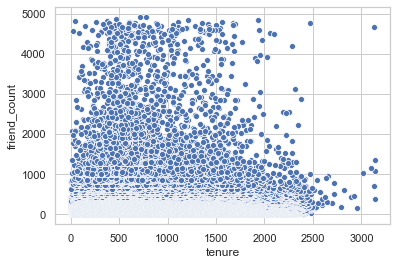

In [522]:
# scatter
sns.scatterplot(x='tenure', y='friend_count', data=df_finial);

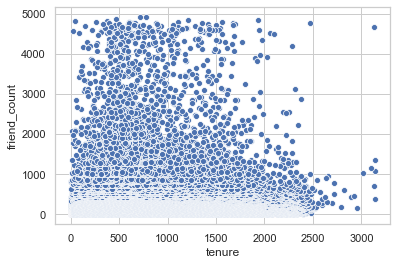

In [523]:
# setstyle 非常方便
sns.set(style='whitegrid')
sns.scatterplot(x='tenure', y='friend_count', data=df_finial);

In [524]:
sns.set?
# jupyter notebook 中可以通过？检查函数 docstring

### // regplot

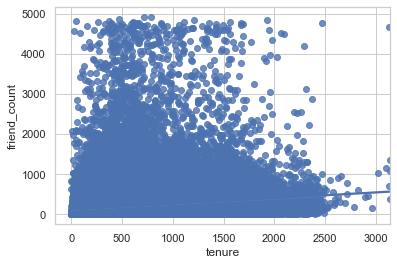

In [525]:
# sns 也有一些定义好的复杂些的图形，比如这个 regplot 会画出回归线
sns.regplot(x='tenure', y='friend_count', data=df_finial);

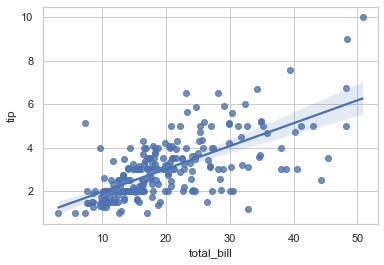

In [526]:
# 官方数据点较少的示例
tips = sns.load_dataset("tips")
ax = sns.regplot(x="total_bill", y="tip", data=tips);

### // relplot
relplot的输出是气泡图，可以定义颜色类别，大小和透明度 alpha（有的图形类别无法定义透明度）。

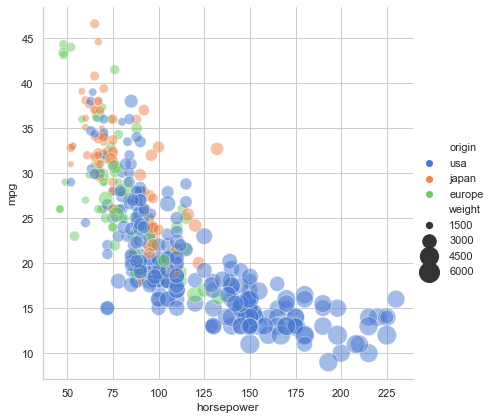

In [527]:
# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg);

### // jointplot
jointplot 是把散点图和直方图结合的图，展示起来比较高效

In [528]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df_temp = pd.DataFrame(data, columns=["x", "y"])
df_temp

,x,y
0,0.207761,1.122826
1,-0.728488,0.053935
2,0.801948,1.754853
3,0.636127,0.991100
4,0.740143,0.828264
...,...,...
195,0.981205,2.371809
196,0.397618,0.468949
197,-1.007082,-1.161039
198,-0.178412,1.897630


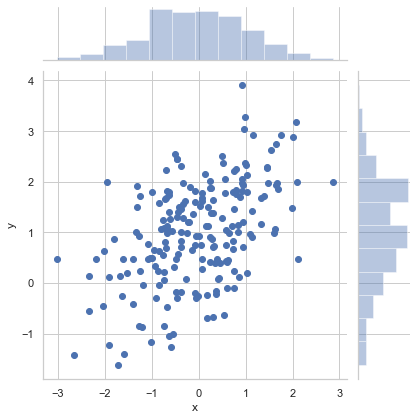

In [529]:
sns.jointplot(x="x", y="y", data=df_temp);

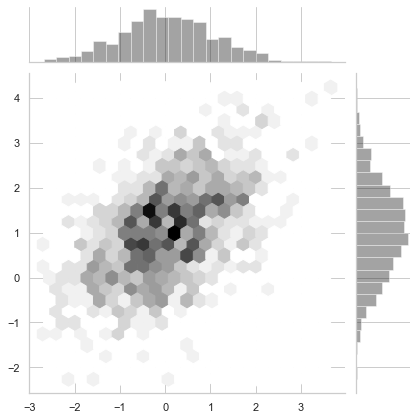

In [530]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
#with sns.axes_style("white"):
sns.jointplot(x=x, y=y, kind="hex", color="k");

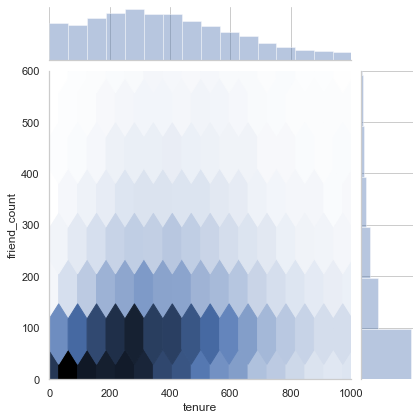

In [531]:
# Hex Plot
plot = sns.jointplot(x='tenure', y='friend_count', kind='hex', data=df_finial, 
                     xlim=(0,1000), ylim=(0,600));
#实际运用的话，因为数据中的 friend count 差异性比较大，画出来并不十分好看
#而且hex做了 xlim 和 ylim 设置的话，六边形会拉长（需要对数据先做处理再画图就正常了）
#官方文档 https://seaborn.pydata.org/generated/seaborn.jointplot.html


### // pairplot
pairplot 和 pandas scatter_matrix 的方式一样。

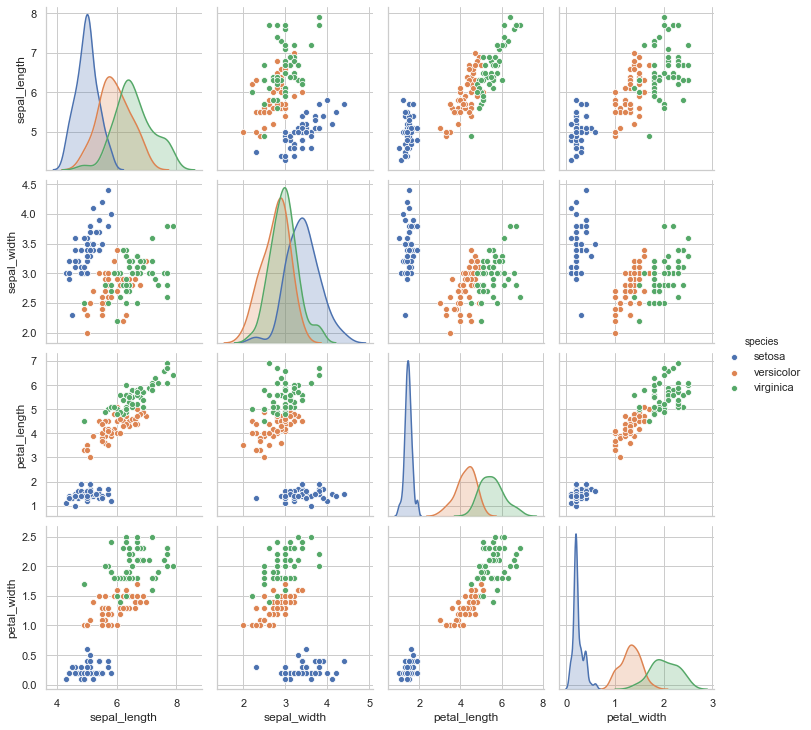

In [532]:
# pairplot
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species")
# 可以直接指定 hue 为分类数据
# https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot

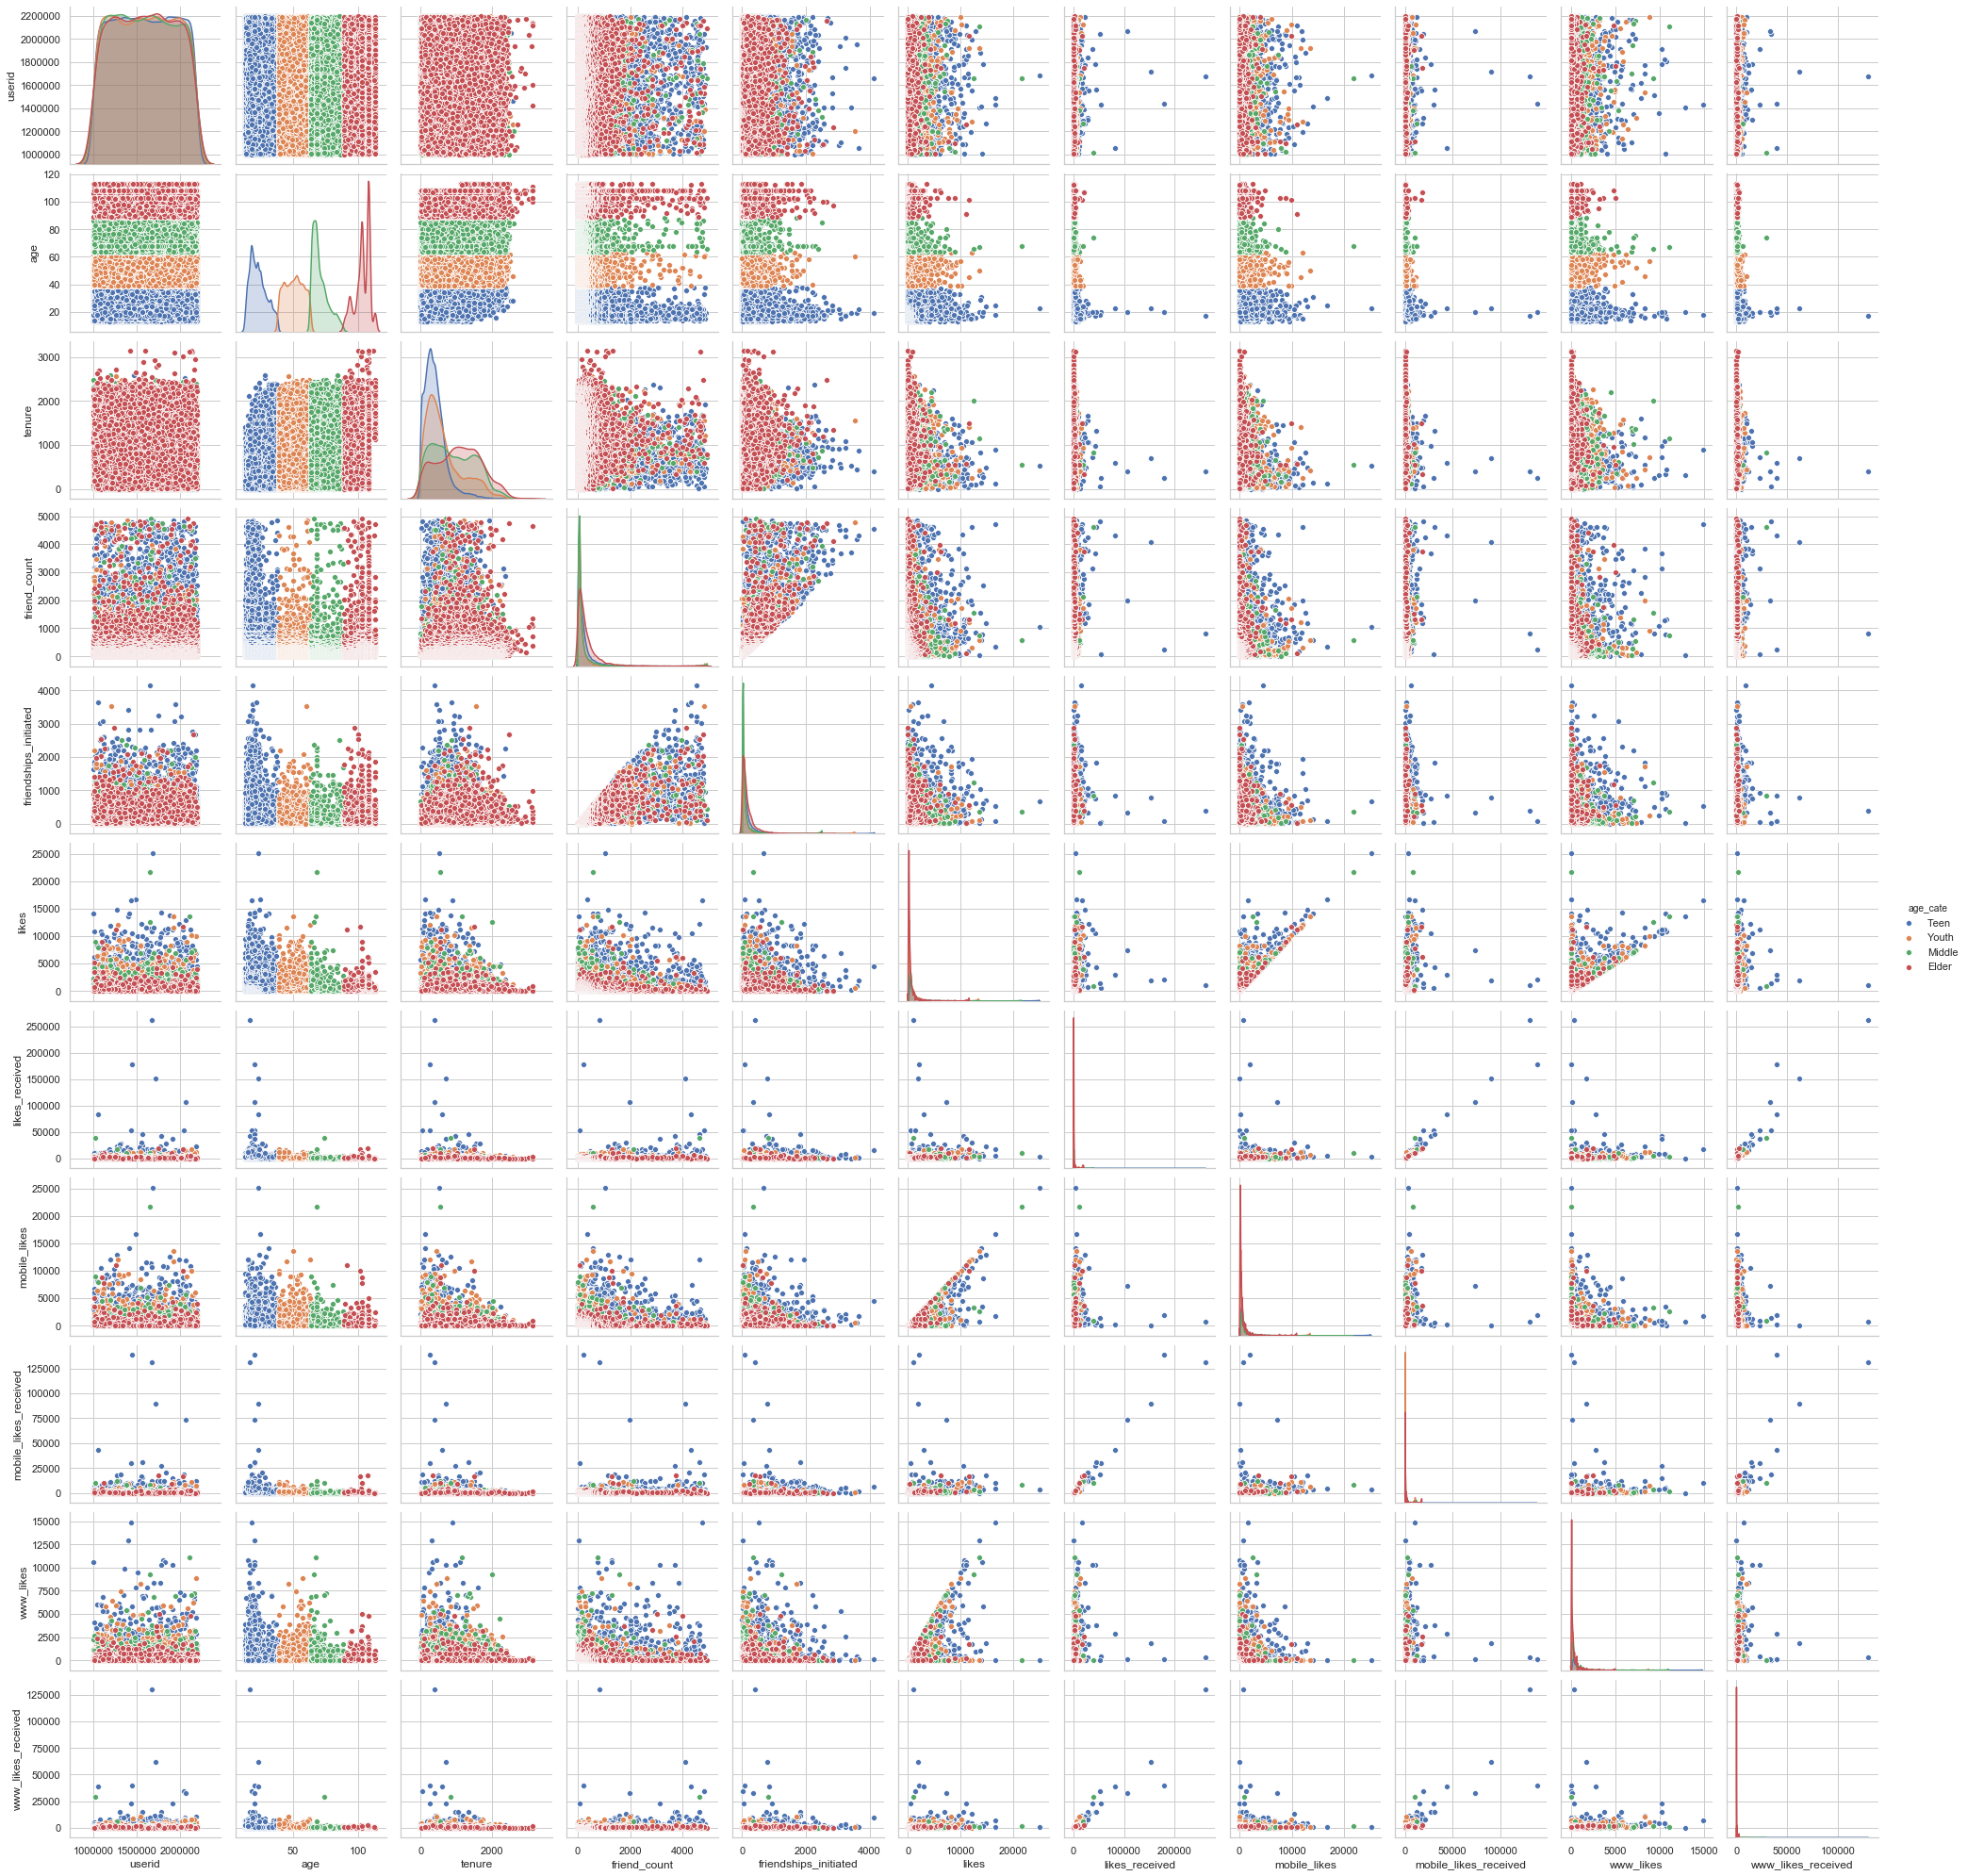

In [533]:
# 直接在真实数据中使用，hue对应分类数据可以看出分类情况
sns.pairplot(df_finial, hue="age_cate");

## / Conclusion
本项目通过 facebook 的 sns 数据介绍了数据分析流程中的处理方法。从数据准备、数据评估、数据清理和数据探索4个方面的问题和入手，示例了如何使用 pandas、seaborn、matplotlib 等库的主要方法。

在数据分析的过程中，不同数据会有不同的特点，仅仅通过1，2个数据的练习无法达到精通的水平。希望同学学习完成后可以根据本项目的思路进行练习和主动探索。在遇到报错和困难时多参考官方文档，多用英文搜索（bing浏览器搜索结果可以选择国际版，会发现很多有用的信息。

另外，在数据分析完成后，还要记得根据需要和要求做输出，重点是展示你发现的信息，而不是所有你探索过的信息，我们分别用 seaborn 和 pandas 画图做两个例子：

### // 喜欢的数量随年龄逐渐下降

In [537]:
# 选择关键列
selected_list = ['age', 'gender', 'friend_count',
                 'likes', 'likes_received', 'age_cate']

In [538]:
# 提供 age 分组详细信息
df_finial[selected_list].groupby(df_finial['age_cate']).mean()

,age,friend_count,likes,likes_received
age_cate,,,,
Teen,23.504031,217.699022,156.453728,162.884112
Youth,50.915386,107.249566,157.912314,104.347940
Middle,70.697924,149.232229,147.945827,89.854118
Elder,103.231125,392.983491,155.513590,132.170525


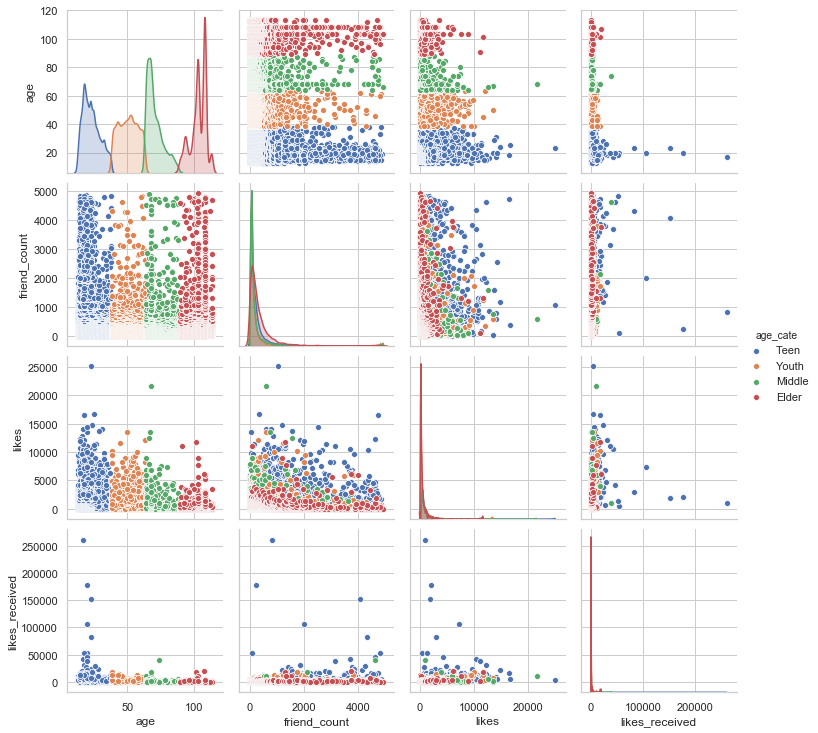

In [539]:
# 画图 hue age_cate
sns.pairplot(df_finial[selected_list], hue="age_cate");

In [540]:
# 接下来画 age 和 likes 图，先准备下 x 轴的标点位置
maxage = df_finial.age.max()
ageticks = [0, maxage/4, maxage/2, 3*maxage/4]
ageticks

[0, 28.25, 56.5, 84.75]

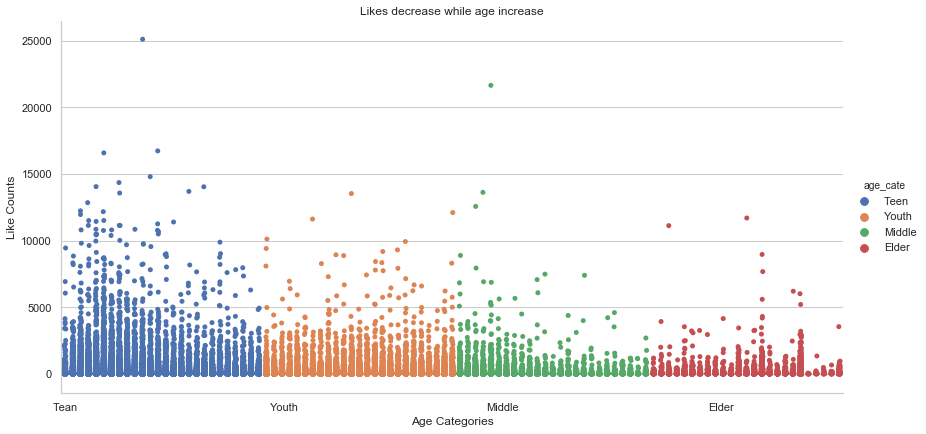

In [541]:
# 赋予 ax 变量，后续设定细节需要使用 .set 方式
g = sns.catplot(x="age", y="likes", hue="age_cate", height=6, aspect=2, data=df_finial)

# 设定 x 轴位置和标签名，否则默认会使用年龄，会比较乱
g.set(xticks=ageticks)
g.set(xticklabels=['Tean','Youth','Middle','Elder'])

# 设定轴名称和图 title
g.set(xlabel='Age Categories')
g.set(ylabel='Like Counts')
g.set(title='Likes decrease while age increase')

# 显示图像
plt.show()

# 推荐seaborn官方api参考 https://seaborn.pydata.org/api.html

### // 女性用户在好友数、点赞数和收到点赞指标更高

In [548]:
# 选择关键列
selected_list = ['gender', 'friend_count',
                 'likes', 'likes_received', 'age_cate']

In [549]:
# 如果选择 gender 做 pairplot 的话图会看不出什么（点太多了，大家可以试一下）
# 但是其实区分度还很大的
df_finial[selected_list].groupby(df_finial['gender']).mean()

,friend_count,likes,likes_received
gender,,,
female,241.977368,260.061065,251.445965
male,165.035459,84.677895,67.911548


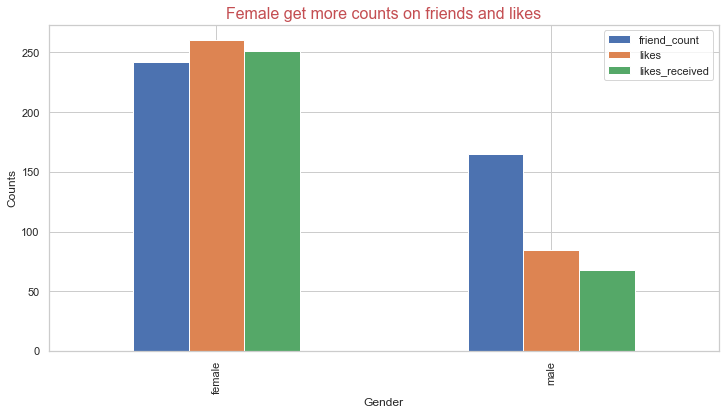

In [550]:
# 接下来我们试试用 pandas 的方式画下男女对比
# pandas 直接 DataFrame 接 plot 的方式非常方便
# 并且默认 plt 直接将参数写到当前图形， 非常方便
df_temp = df_finial[selected_list].groupby(df_finial['gender']).mean()
df_temp.plot(kind='bar', figsize=(12,6));
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Female get more counts on friends and likes', color='r', fontsize=16);